In [37]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

ModuleNotFoundError: No module named 'scipy'

In [5]:
cwd = os.getcwd()
parent_dir = os.path.dirname(cwd)
get_data_dir = os.path.join(parent_dir, 'get_data')
data_dir = os.path.join(get_data_dir, 'output')
file_path = os.path.join(data_dir, 'battles.csv')

output_dir = os.path.join(cwd, 'output')
os.makedirs(output_dir, exist_ok=True)

data = pd.read_csv(file_path)

victors = []

for row in data.itertuples(index=False):
    team1 = [row[8], row[10], row[12]]
    team2 = [row[14], row[16], row[18]]

    if row[4] == 'victory':
        victor = 1 if row[5] in set(team1) else 2
    elif row[4] == 'defeat':
        victor = 2 if row[5] in set(team1) else 1
    else:
        victor = 0
    
    victors.append(victor)

df = data[['Mode', 'Map']]
df.insert(2, 'Victor', victors)
df = pd.concat([df, data.iloc[:, range(8, 19, 2)]], axis=1)

df.to_csv(os.path.join(output_dir, 'victors.csv'), index=False)

display(df)

,Mode,Map,Victor,"Brawler 1,1","Brawler 1,2","Brawler 1,3","Brawler 2,1","Brawler 2,2","Brawler 2,3"
0,hotZone,Dueling Beetles,2,CROW,BROCK,FANG,MR. P,LARRY & LAWRIE,JESSIE
1,hotZone,Dueling Beetles,2,CROW,BROCK,FANG,MR. P,LARRY & LAWRIE,JESSIE
2,knockout,Belle's Rock,1,SHELLY,DYNAMIKE,SPROUT,PIPER,MORTIS,GROM
3,knockout,Belle's Rock,1,SHELLY,DYNAMIKE,SPROUT,PIPER,MORTIS,GROM
4,bounty,Hideout,1,MANDY,GENE,SPROUT,MELODIE,BELLE,BYRON
...,...,...,...,...,...,...,...,...,...
4131,gemGrab,Double Swoosh,2,BO,AMBER,JANET,GALE,JESSIE,SURGE
4132,gemGrab,Double Swoosh,2,SANDY,GENE,SURGE,GRIFF,GALE,BUZZ
4133,gemGrab,Double Swoosh,2,SANDY,GENE,SURGE,GRIFF,GALE,BUZZ
4134,gemGrab,Hard Rock Mine,2,8-BIT,LEON,BERRY,GALE,SURGE,MEG


In [8]:
brawlers = sorted(list(set(df.iloc[:, 3:].to_numpy().ravel())))

winrates = pd.DataFrame({'Wins': [0]*len(brawlers), 'Games': [0]*len(brawlers)}, index=brawlers)

indices = {}

for row in df.itertuples(index=False):
    victor = row[2]
    team1 = row[3:6]
    team2 = row[6:9]

    for brawler in team1:
        winrates.loc[brawler, 'Games'] += 1

        if victor == 1:
            winrates.loc[brawler, 'Wins'] += 1

    for brawler in team2:
        winrates.loc[brawler, 'Games'] += 1

        if victor == 2:
            winrates.loc[brawler, 'Wins'] += 1

rates = winrates['Wins'].div(winrates['Games'])
winrates.insert(2, 'Win Rate', rates)

winrates.to_csv(os.path.join(output_dir, 'winrates.csv'), index=False)

display(winrates)

,Wins,Games,Win Rate
8-BIT,42,88,0.477273
AMBER,148,331,0.447130
ANGELO,278,613,0.453507
ASH,16,30,0.533333
BARLEY,328,622,0.527331
...,...,...,...
STU,147,316,0.465190
SURGE,292,550,0.530909
TARA,37,71,0.521127
TICK,108,244,0.442623


,8-BIT,AMBER,ANGELO,ASH,BARLEY,BEA,BELLE,BERRY,BIBI,BO,...,SANDY,SHELLY,SPIKE,SPROUT,SQUEAK,STU,SURGE,TARA,TICK,WILLOW
8-BIT,NaN,0.000000,1.000000,0.000000,NaN,0.000000,0.461538,0.000000,NaN,1.000000,...,0.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000,0.800000,NaN,NaN
AMBER,1.0,NaN,0.333333,0.666667,0.357143,NaN,0.666667,0.411765,0.384615,0.533333,...,0.285714,0.666667,0.411765,0.600000,0.0,0.428571,0.523810,0.000000,NaN,0.400
ANGELO,0.0,0.666667,NaN,NaN,0.515152,1.000000,0.484848,0.333333,0.400000,0.500000,...,0.333333,0.800000,0.666667,0.527778,NaN,0.500000,0.461538,NaN,0.565217,NaN
ASH,1.0,0.333333,NaN,NaN,NaN,NaN,NaN,0.800000,0.600000,0.000000,...,0.857143,NaN,0.333333,0.333333,NaN,NaN,0.000000,NaN,NaN,0.000
BARLEY,NaN,0.642857,0.484848,NaN,NaN,0.800000,0.400000,0.520000,0.342105,0.250000,...,0.571429,0.800000,0.560000,0.571429,0.0,0.585366,0.491525,NaN,0.700000,0.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STU,NaN,0.571429,0.500000,NaN,0.414634,0.400000,0.500000,0.200000,0.428571,0.000000,...,0.456522,0.000000,0.333333,0.000000,NaN,NaN,0.346154,0.333333,0.700000,NaN
SURGE,1.0,0.476190,0.538462,1.000000,0.508475,1.000000,1.000000,0.571429,0.642857,1.000000,...,0.500000,0.750000,0.360000,0.500000,NaN,0.653846,NaN,0.250000,0.888889,0.625
TARA,0.2,1.000000,NaN,NaN,NaN,NaN,0.000000,0.500000,NaN,NaN,...,0.181818,NaN,0.000000,NaN,NaN,0.666667,0.750000,NaN,NaN,NaN
TICK,NaN,NaN,0.434783,NaN,0.300000,1.000000,0.703704,0.142857,NaN,0.600000,...,0.000000,0.333333,0.500000,0.481481,0.2,0.300000,0.111111,NaN,NaN,0.000


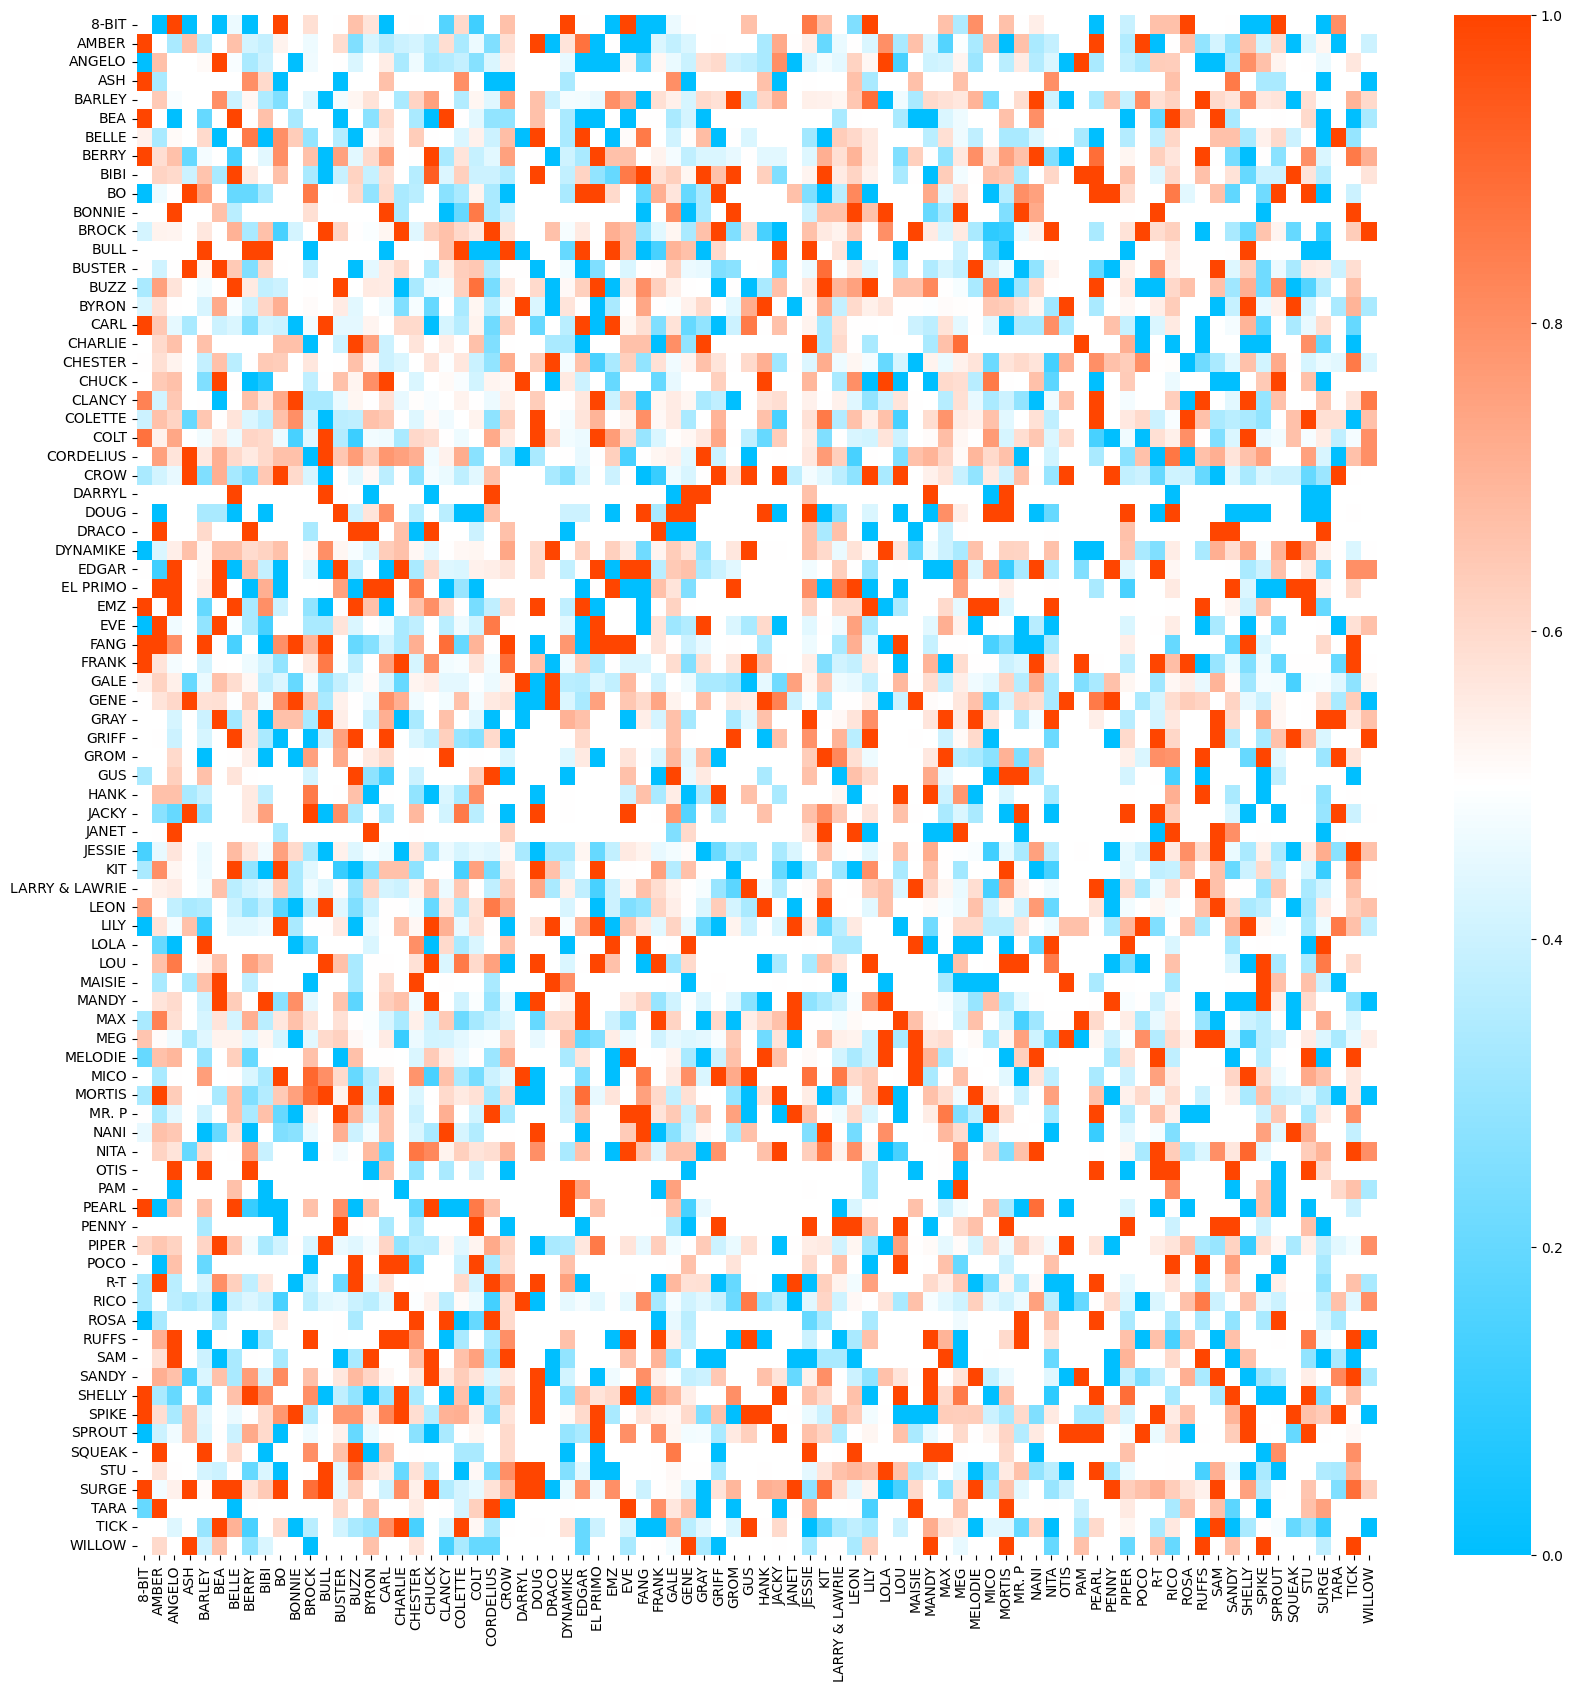

In [9]:
against_wins = pd.DataFrame(index=brawlers, columns=brawlers)
against_wins = against_wins.fillna(0)

against_games = pd.DataFrame(index=brawlers, columns=brawlers)
against_games = against_games.fillna(0)

for row in df.itertuples(index=False):
    victor = row[2]
    
    if victor == 0:
        continue

    team1 = row[3:6]
    team2 = row[6:9]

    for brawler1 in team1:
        for brawler2 in team2:

            against_games.loc[brawler1, brawler2] += 1
            against_games.loc[brawler2, brawler1] += 1
        
            if victor == 1:
                against_wins.loc[brawler1, brawler2] += 1
            else:
                against_wins.loc[brawler2, brawler1] += 1

against_winrates = against_wins.div(against_games)

plt.figure(figsize=(20,20))
cmap = LinearSegmentedColormap.from_list('coolwarm_custom', ['#00BFFF', '#FFFFFF', '#FF4500'], N=256)
sns.heatmap(against_winrates, annot=False, cmap=cmap, vmin=0, vmax=1)

against_winrates.to_csv(os.path.join(output_dir, 'against_winrates.csv'))
against_wins.to_csv(os.path.join(output_dir, 'against_wins.csv'))
against_games.to_csv(os.path.join(output_dir, 'against_games.csv'))
plt.savefig(os.path.join(output_dir, 'against_heatmap.png'), format='png', dpi=300, bbox_inches='tight')

display(against_winrates)
plt.show()

,8-BIT,AMBER,ANGELO,ASH,BARLEY,BEA,BELLE,BERRY,BIBI,BO,...,SANDY,SHELLY,SPIKE,SPROUT,SQUEAK,STU,SURGE,TARA,TICK,WILLOW
8-BIT,NaN,NaN,0.000000,NaN,0.000000,NaN,0.666667,0.000000,0.666667,NaN,...,0.428571,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,NaN
AMBER,NaN,NaN,0.375000,NaN,0.181818,NaN,0.000000,1.000000,0.571429,0.000000,...,0.617647,NaN,0.545455,0.000000,NaN,0.461538,0.166667,0.000000,1.000000,0.333333
ANGELO,0.0,0.375000,NaN,NaN,0.550000,0.4,0.218750,0.631579,1.000000,0.444444,...,0.222222,0.666667,0.428571,0.514286,1.000000,0.437500,0.333333,NaN,0.230769,NaN
ASH,NaN,NaN,NaN,NaN,0.800000,NaN,NaN,NaN,0.666667,NaN,...,0.000000,NaN,1.000000,NaN,NaN,NaN,0.333333,NaN,NaN,NaN
BARLEY,0.0,0.181818,0.550000,0.800000,NaN,1.0,0.250000,0.000000,0.517241,0.636364,...,0.656250,0.538462,0.450000,0.500000,NaN,0.563636,0.604167,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
STU,NaN,0.461538,0.437500,NaN,0.563636,0.0,0.500000,0.400000,0.600000,NaN,...,0.600000,0.000000,0.533333,0.666667,NaN,NaN,0.571429,NaN,NaN,1.000000
SURGE,NaN,0.166667,0.333333,0.333333,0.604167,0.0,1.000000,0.500000,0.608696,0.714286,...,0.553191,0.571429,0.590909,0.600000,0.800000,0.571429,NaN,0.888889,NaN,0.333333
TARA,0.0,0.000000,NaN,NaN,0.000000,NaN,NaN,1.000000,NaN,0.000000,...,0.000000,NaN,1.000000,NaN,NaN,NaN,0.888889,NaN,NaN,0.666667
TICK,1.0,1.000000,0.230769,NaN,0.000000,0.5,0.636364,0.600000,0.333333,NaN,...,0.454545,0.666667,0.375000,0.333333,0.333333,NaN,NaN,NaN,NaN,NaN


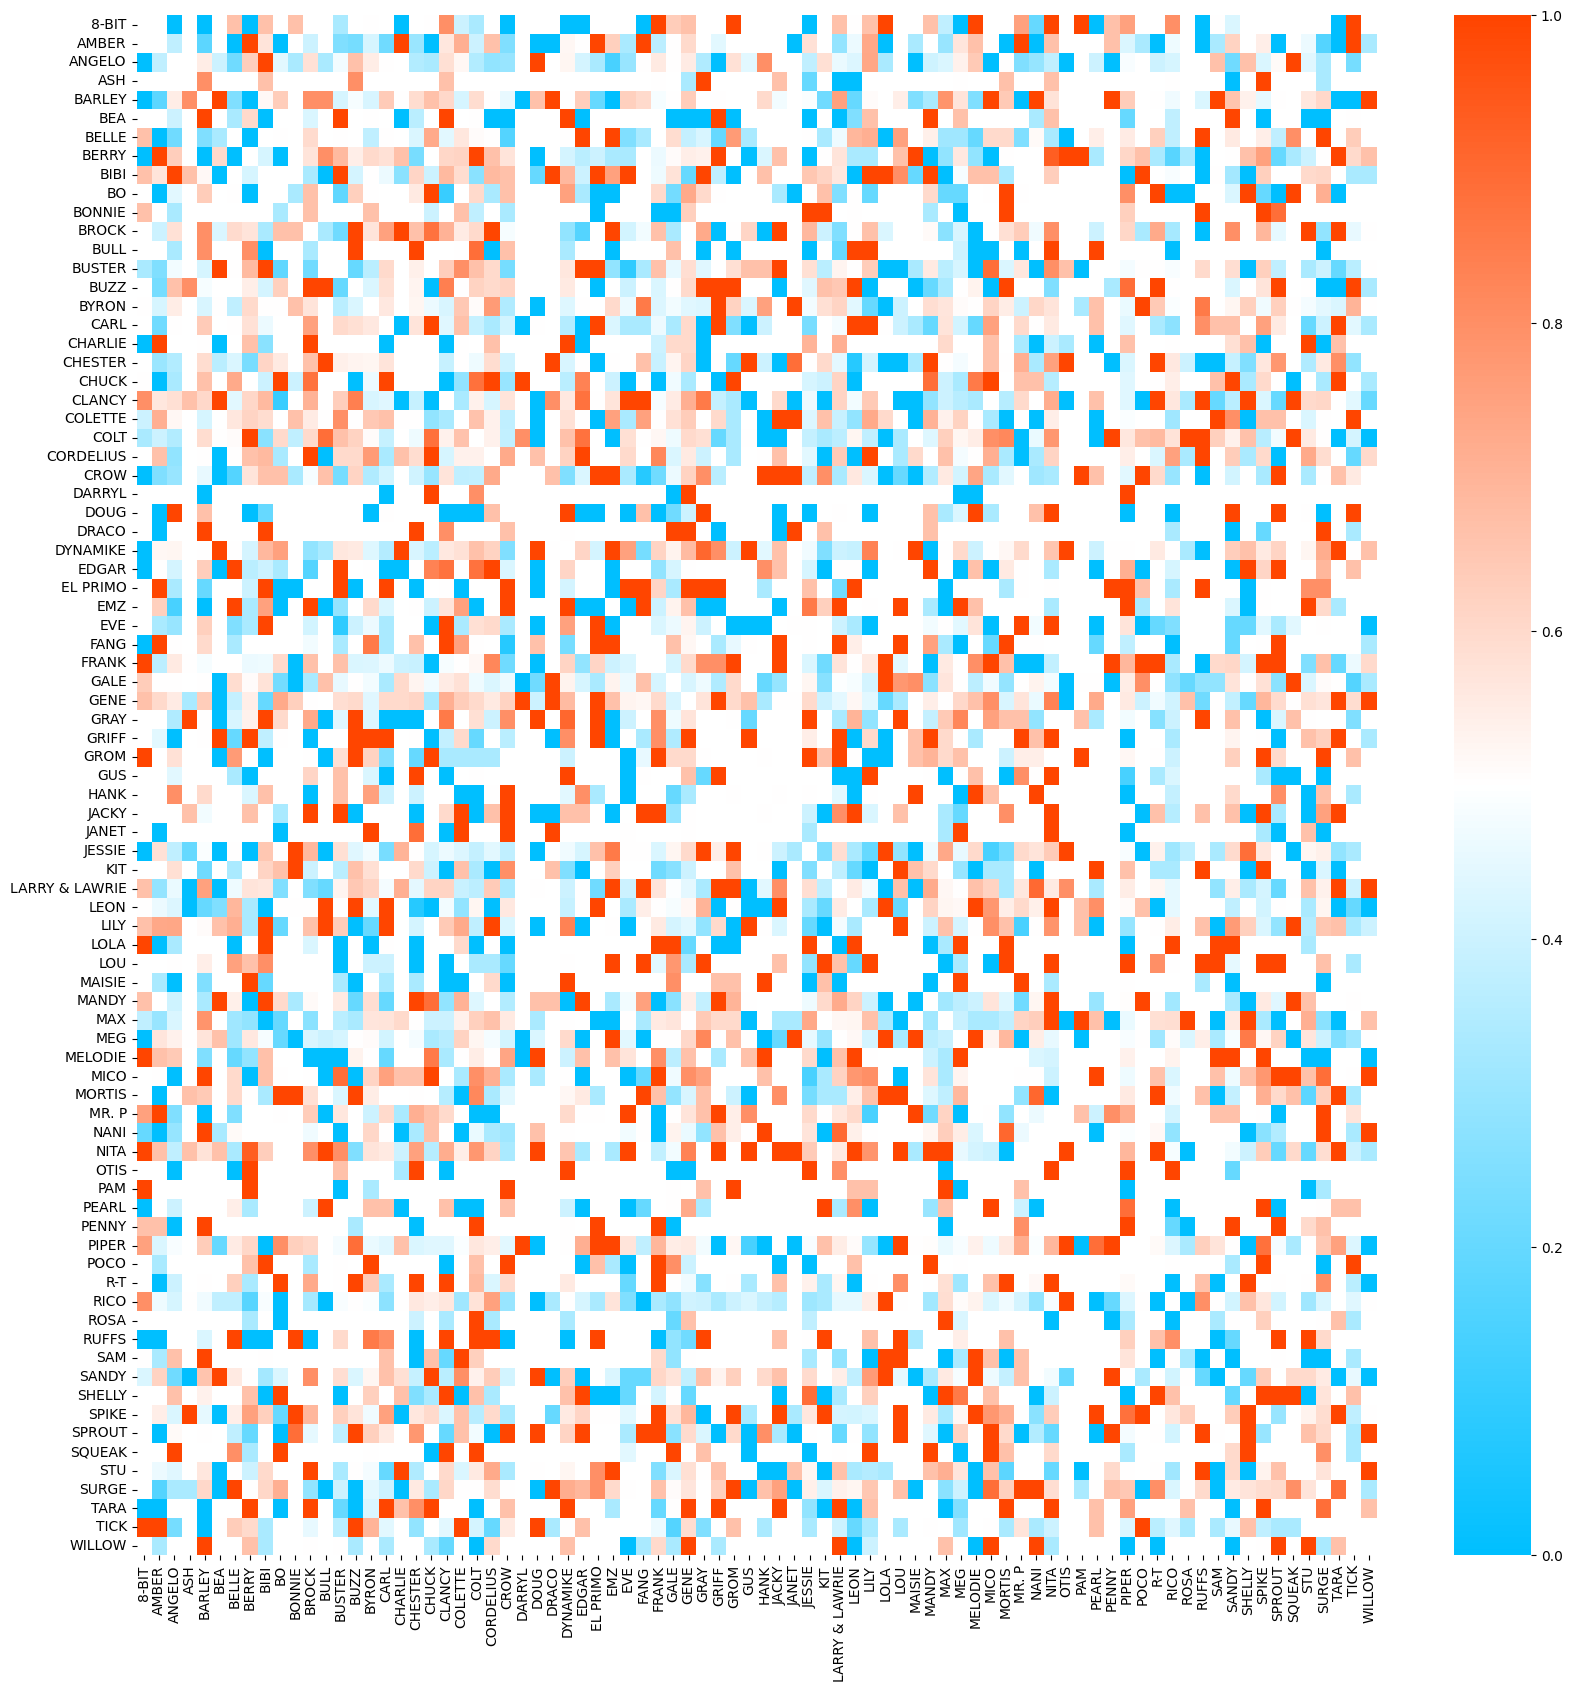

In [10]:
with_wins = pd.DataFrame(index=brawlers, columns=brawlers)
with_wins = with_wins.fillna(0)

with_games = pd.DataFrame(index=brawlers, columns=brawlers)
with_games = with_games.fillna(0)

for row in df.itertuples(index=False):
    victor = row[2]

    if victor == 0:
        continue

    team1 = row[3:6]
    team2 = row[6:9]

    for i in range(len(team1)):
        for j in range(i+1, len(team1)):    
            brawler1 = team1[i]
            brawler2 = team1[j]

            with_games.loc[brawler1, brawler2] += 1
            with_games.loc[brawler2, brawler1] += 1
        
            if victor == 1:
                with_wins.loc[brawler1, brawler2] += 1
                with_wins.loc[brawler2, brawler1] += 1

            brawler1 = team2[i]
            brawler2 = team2[j]

            with_games.loc[brawler1, brawler2] += 1
            with_games.loc[brawler2, brawler1] += 1
        
            if victor == 2:
                with_wins.loc[brawler1, brawler2] += 1
                with_wins.loc[brawler2, brawler1] += 1     
    
with_winrates = with_wins.div(with_games)

plt.figure(figsize=(20,20))
cmap = LinearSegmentedColormap.from_list('coolwarm_custom', ['#00BFFF', '#FFFFFF', '#FF4500'], N=256)
sns.heatmap(with_winrates, annot=False, cmap=cmap, vmin=0, vmax=1)

with_wins.to_csv(os.path.join(output_dir, 'with_wins.csv'))
with_winrates.to_csv(os.path.join(output_dir, 'with_winrates.csv'))
with_games.to_csv(os.path.join(output_dir, 'with_games.csv'))
plt.savefig(os.path.join(output_dir, 'with_heatmap.png'), format='png', dpi=300, bbox_inches='tight')

display(with_winrates)
plt.show()

In [36]:
with_wins = with_wins.fillna(0) + 1
with_games = with_games.fillna(0) + 2
against_wins = against_wins.fillna(0) + 1
against_games = against_games.fillna(0) + 2

with_winrates = with_wins.div(with_games)
against_winrates = against_wins.div(against_games)

matchups = {}

for row in df.itertuples(index=False):
    victor = row[2]

    if victor == 0:
        continue

    team1 = row[3:6]
    team2 = row[6:9]

    key = tuple(team1 + team2)

    if key not in matchups:
        matchups[key] = (1, 2)

    if victor == 1:
        matchups[key] = (matchups[key][0] + 1, matchups[key][1])
    else:
        matchups[key] = (matchups[key][0], matchups[key][1] + 1)

keys = list(matchups.keys())
keys.sort()

regression = pd.DataFrame(index=pd.Index(keys), columns=['Win Rate', 'Individual Win Rate', 'With Win Rate', 'Against Win Rate'])

for key in keys:
    regression.loc[key, 'Win Rate'] = matchups[key][0] / (matchups[key][0] + matchups[key][1])
    
    individual_rate = 0
    with_rate = 0
    against_rate = 0

    for i in range(3):
        individual_rate += (winrates.loc[key[i], 'Wins'] + 1) / (winrates.loc[key[i], 'Games'] + 2)
        individual_rate += 1 - (winrates.loc[key[i+3], 'Wins'] + 1) / (winrates.loc[key[i+3], 'Games'] + 2)

    for i in range(3):
        for j in range(i+1, 3):
            with_rate += with_winrates.loc[key[i], key[j]]
            with_rate += 1 - with_winrates.loc[key[i+3], key[j+3]]

    for i in range(3):
        for i in range(3, 6):
            against_rate += against_winrates.loc[key[i], key[j]]
    
    regression.loc[key, 'Individual Win Rate'] = individual_rate / 6
    regression.loc[key, 'With Win Rate'] = with_rate / 6
    regression.loc[key, 'Against Win Rate'] = against_rate / 9

regression['Individual Win Rate'] = regression['Individual Win Rate'].astype('float64')
regression['With Win Rate'] = regression['With Win Rate'].astype('float64')
regression['Against Win Rate'] = regression['Against Win Rate'].astype('float64')
regression['Win Rate'] = regression['Win Rate'].astype('float64')

x = regression[['Individual Win Rate', 'With Win Rate', 'Against Win Rate']].to_numpy()
y = regression['Win Rate'].to_numpy()

coefficients, residuals, rank, s = np.linalg.lstsq(x, y, rcond=None)

intercept = coefficients[0]
feature_coefficients = coefficients[1:]

print("Intercept:", intercept)
print("Coefficients:", feature_coefficients)

Win Rate  \
8-BIT  BIBI     GALE   BUZZ           JESSIE  GENE            0.500000   
       COLETTE  SANDY  MEG            ASH     RICO            0.200000   
       DYNAMIKE JESSIE FANG           EMZ     CLANCY          0.200000   
       LEON     BERRY  GALE           SURGE   MEG             0.200000   
       MANDY    CROW   AMBER          MEG     FRANK           0.200000   
...                                                                ...   
TICK   SPIKE    LEON   BARLEY         FANG    JESSIE          0.200000   
WILLOW BIBI     CARL   AMBER          MEG     LILY            0.333333   
       RICO     SPIKE  LARRY & LAWRIE BARLEY  GALE            0.600000   
       SANDY    SURGE  BARLEY         CHESTER RICO            0.200000   
       SURGE    CHUCK  GALE           CLANCY  LARRY & LAWRIE  0.333333   

                                                              Individual Win Rate  \
8-BIT  BIBI     GALE   BUZZ           JESSIE  GENE                       0.490060   
       COLETTE  SANDY  MEG            ASH     RICO                       0.511730   
       DYNAMIKE JESSIE FANG           EMZ     CLANCY                     0.491454   
       LEON     BERRY  GALE           SURGE   MEG                        0.494892   
       MANDY    CROW   AMBER          MEG     FRANK                      0.494822   
...                                                                           ...   
TICK   SPIKE    LEON   BARLEY         FANG    JESSIE                     0.494914   
WILLOW BIBI     CARL   AMBER          MEG     LILY                       0.502184   
       RICO     SPIKE  LARRY & LAWRIE BARLEY  GALE                       0.489194   
       SANDY    SURGE  BARLEY         CHESTER RICO                       0.509111   
       SURGE    CHUCK  GALE           CLANCY  LARRY & LAWRIE             0.497343   

                                                              With Win Rate  \
8-BIT  BIBI     GALE   BUZZ           JESSIE  GENE                 0.511997   
       COLETTE  SANDY  MEG            ASH     RICO                 0.506765   
       DYNAMIKE JESSIE FANG           EMZ     CLANCY               0.475132   
       LEON     BERRY  GALE           SURGE   MEG                  0.502030   
       MANDY    CROW   AMBER          MEG     FRANK                0.488632   
...                                                                     ...   
TICK   SPIKE    LEON   BARLEY         FANG    JESSIE               0.481668   
WILLOW BIBI     CARL   AMBER          MEG     LILY                 0.484124   
       RICO     SPIKE  LARRY & LAWRIE BARLEY  GALE                 0.498195   
       SANDY    SURGE  BARLEY         CHESTER RICO                 0.481025   
       SURGE    CHUCK  GALE           CLANCY  LARRY & LAWRIE       0.475852   

                                                              Against Win Rate  
8-BIT  BIBI     GALE   BUZZ           JESSIE  GENE                    0.507604  
       COLETTE  SANDY  MEG            ASH     RICO                    0.499102  
       DYNAMIKE JESSIE FANG           EMZ     CLANCY                  0.516678  
       LEON     BERRY  GALE           SURGE   MEG                     0.501424  
       MANDY    CROW   AMBER          MEG     FRANK                   0.553600  
...                                                                        ...  
TICK   SPIKE    LEON   BARLEY         FANG    JESSIE                  0.530835  
WILLOW BIBI     CARL   AMBER          MEG     LILY                    0.495951  
       RICO     SPIKE  LARRY & LAWRIE BARLEY  GALE                    0.476935  
       SANDY    SURGE  BARLEY         CHESTER RICO                    0.461861  
       SURGE    CHUCK  GALE           CLANCY  LARRY & LAWRIE          0.511526  

[1817 rows x 4 columns]

Intercept: -2.6065807776909873
Coefficients: [ 4.86963306 -1.55038519]
